In [9]:
import numpy as np
import matplotlib.pyplot as plt

class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
        Number of clusters
    n_init : int
        How many times to change the initial value of the center point for calculation
    max_iter : int
        Maximum number of iterations in one calculation
    tol : float
        Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
        True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centers = None
        self.labels = None
        self.sse = None

    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        best_sse = np.inf
        for _ in range(self.n_init):
            centers, labels, sse = self._kmeans_iteration(X)
            if sse < best_sse:
                best_sse = sse
                self.centers = centers
                self.labels = labels
                self.sse = sse

    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        distances = np.linalg.norm(X[:, np.newaxis, :] - self.centers, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels

    def _initialize_centers(self, X):
        indices = np.random.choice(len(X), self.n_clusters, replace=False)
        centers = X[indices]
        return centers

    def _calculate_sse(self, X, centers, labels):
        sse = 0
        for i, center in enumerate(centers):
            cluster_points = X[labels == i]
            sse += np.sum((cluster_points - center) ** 2)
        return sse

    def _assign_clusters(self, X, centers):
        distances = np.linalg.norm(X[:, np.newaxis, :] - centers, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels

    def _move_centers(self, X, labels):
        centers = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                centers[i] = np.mean(cluster_points, axis=0)
        return centers

    def _kmeans_iteration(self, X):
        centers = self._initialize_centers(X)
        for _ in range(self.max_iter):
            labels = self._assign_clusters(X, centers)
            new_centers = self._move_centers(X, labels)
            if np.sum(np.abs(new_centers - centers)) <= self.tol:
                break
            centers = new_centers
        sse = self._calculate_sse(X, centers, labels)
        return centers, labels, sse

    def elbow_method(self, X, max_clusters=10):
        sse_values = []
        for k in range(1, max_clusters + 1):
            _, _, sse = self._kmeans_iteration(X)
            sse_values.append(sse)
        plt.plot(range(1, max_clusters + 1), sse_values, marker='o')
        plt.xlabel('Number of clusters')
        plt.ylabel('SSE')
        plt.title('Elbow Method')
        plt.show()


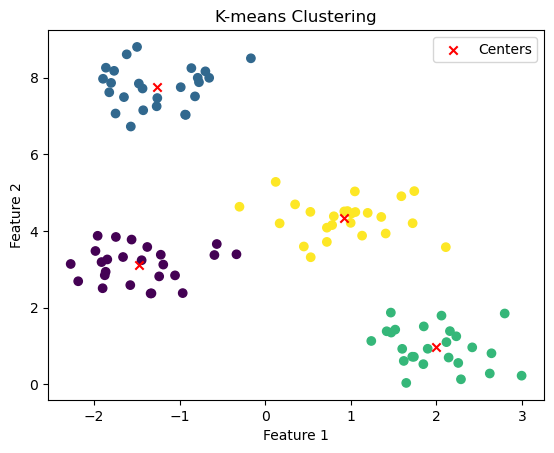

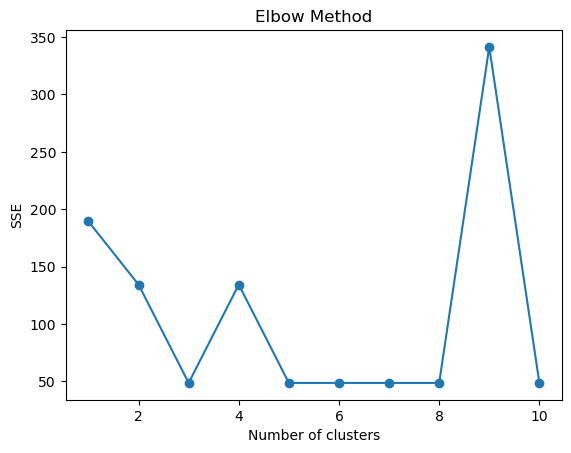

In [10]:
# Sample data generation
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

# Instantiate ScratchKMeans class
kmeans = ScratchKMeans(n_clusters=4, n_init=5, max_iter=100, tol=1e-4, verbose=True)

# Fit the model
kmeans.fit(X)

# Predict clusters for the same data
predicted_labels = kmeans.predict(X)

# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis')
plt.scatter(kmeans.centers[:, 0], kmeans.centers[:, 1], marker='x', c='red', label='Centers')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Elbow method for determining the optimal number of clusters
kmeans.elbow_method(X, max_clusters=10)
